# Using a real Dataset to predict housing prices

dataset link: https://www.kaggle.com/harlfoxem/housesalesprediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# select data from files
from google.colab import files

uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [3]:
# read file into df
import io

df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

## Exploring Data

In [4]:
# check per column if data is missing
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.head

<bound method NDFrame.head of                id        date     price  ...     long  sqft_living15  sqft_lot15
0      7129300520  10/13/2014  221900.0  ... -122.257           1340        5650
1      6414100192   12/9/2014  538000.0  ... -122.319           1690        7639
2      5631500400   2/25/2015  180000.0  ... -122.233           2720        8062
3      2487200875   12/9/2014  604000.0  ... -122.393           1360        5000
4      1954400510   2/18/2015  510000.0  ... -122.045           1800        7503
...           ...         ...       ...  ...      ...            ...         ...
21592   263000018   5/21/2014  360000.0  ... -122.346           1530        1509
21593  6600060120   2/23/2015  400000.0  ... -122.362           1830        7200
21594  1523300141   6/23/2014  402101.0  ... -122.299           1020        2007
21595   291310100   1/16/2015  400000.0  ... -122.069           1410        1287
21596  1523300157  10/15/2014  325000.0  ... -122.299           1020        135

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


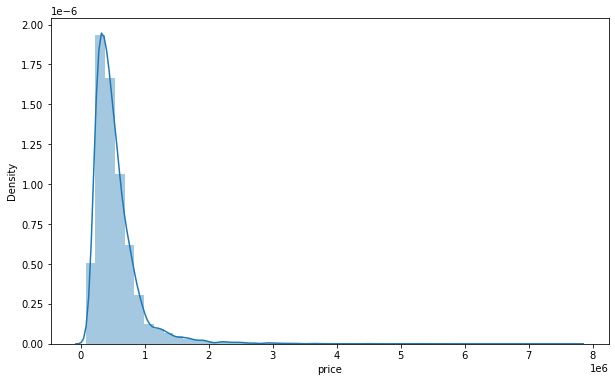

In [7]:
# plot data for examination
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


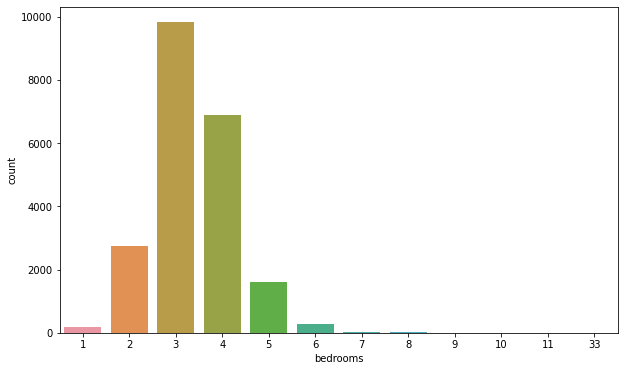

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'])

In [9]:
# check correlations, specifically with price, closer to 1 the higher correlation
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

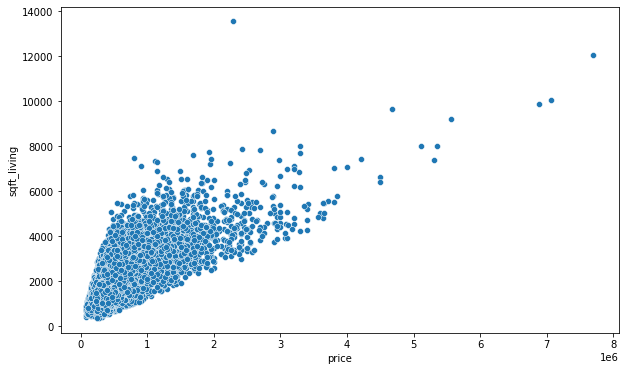

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='sqft_living', data=df)

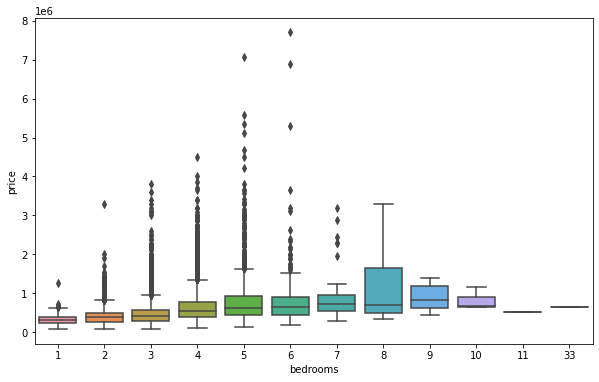

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

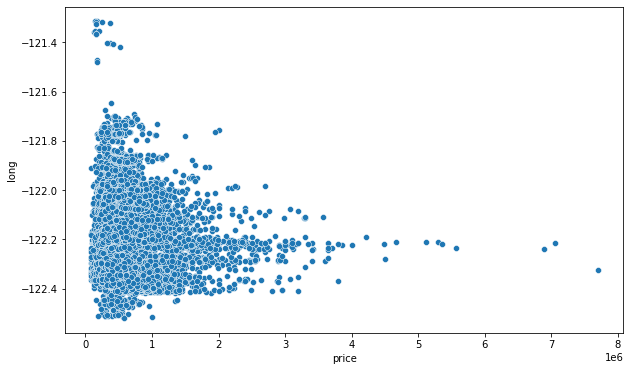

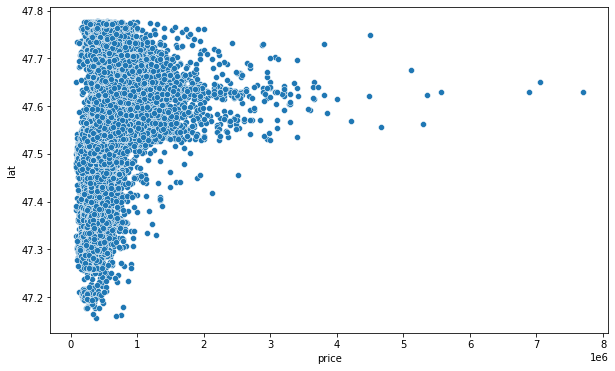

In [12]:
#examine longtitude and latitude
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)

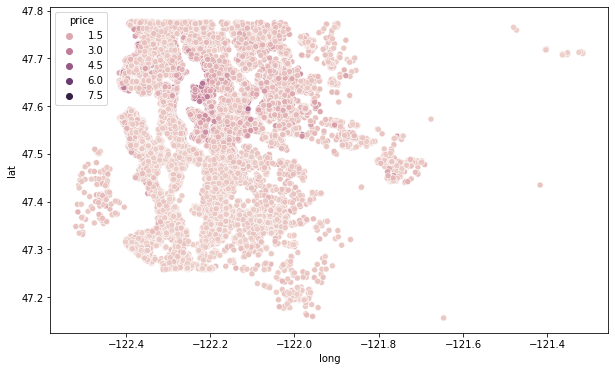

In [13]:
# similiar to map of king county
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df, hue='price')

In [14]:
# will drop outliers skewing data
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [15]:
# grabbing 99% bottom half of data thus (216 = 1%)
non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:]

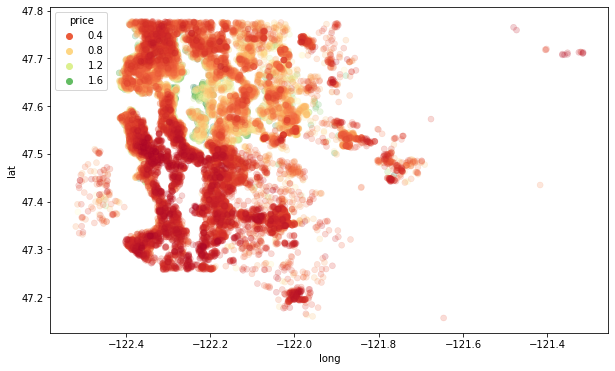

In [16]:
# similiar to map of king county
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=non_top_1_percent,edgecolor=None, alpha=.2, palette='RdYlGn', hue='price')

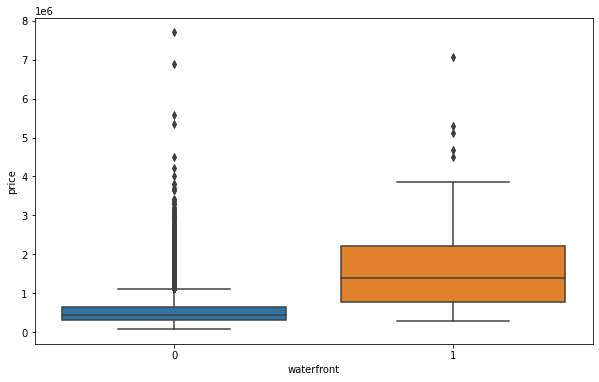

In [17]:
#compare price with if near water
plt.figure(figsize=(10,6))
sns.boxplot(x='waterfront', y = 'price', data=df)

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## feature Engineering



In [19]:
# dropping columns that are not of importance
df = df.drop('id',axis=1)

# convert date to datetime
df['date'] = pd.to_datetime(df['date'])
# extract year
df['year'] = df['date'].apply(lambda date:date.year)
# extract month
df['month'] = df['date'].apply(lambda date:date.month)

In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


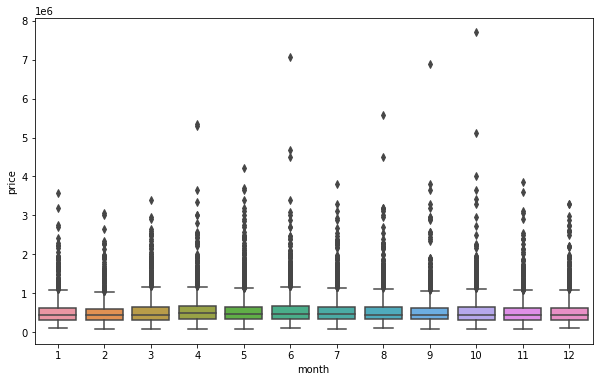

In [21]:
# compare price with month of sale visually
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

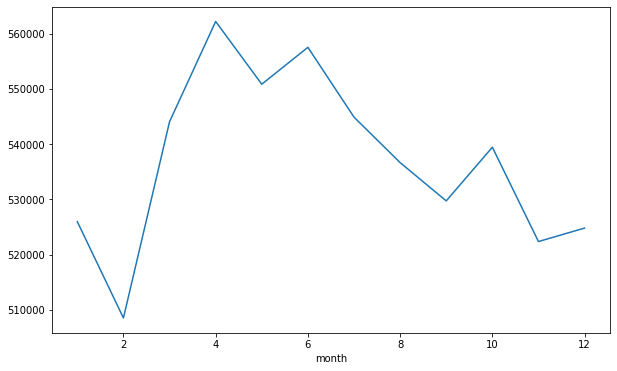

In [22]:
# compare price with month of sale numerically(remove .plot())
plt.figure(figsize=(10,6))
df.groupby('month').mean()['price'].plot()

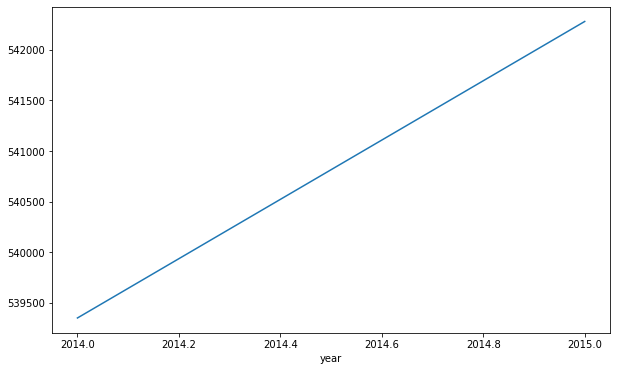

In [23]:
# compare price with year of sale numerically
plt.figure(figsize=(10,6))
df.groupby('year').mean()['price'].plot()

In [24]:
# dropping columns that are not of importance
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1) # can keep and check if certain zip codes contain higher priced houses

##Training model 

In [25]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [26]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit and transform
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
X_train.shape

(15117, 19)

In [30]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# since we havbe 19 columns well have 19 nodes in first layer with relu activation
model = Sequential([Dense(19, activation='relu'),
                    Dense(19, activation='relu'),
                    Dense(19, activation='relu'),
                    Dense(19, activation='relu'),
                    Dense(1)])

# using adam optimizer
model.compile(optimizer='adam', loss='mse')

In [32]:
# fit model, validation data allows keras to run test data after epoch to compare loss error to see how well we are doing test and train
#(doesnt train model and affect weights and biases using test data), will help see if overfitting
model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430243315712.0000 - val_loss: 418939338752.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429600604160.0000 - val_loss: 416719405056.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 420667817984.0000 - val_loss: 396161220608.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 374487711744.0000 - val_loss: 316768649216.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 256367165440.0000 - val_loss: 172926943232.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 132112162816.0000 - val_loss: 99726163968.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 99817930752.0000 - val_loss: 94818304000.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 97113161728.0000 - val_loss: 93000687616.0000
Epoch 9/400
119/119 [

## Model Evaluation

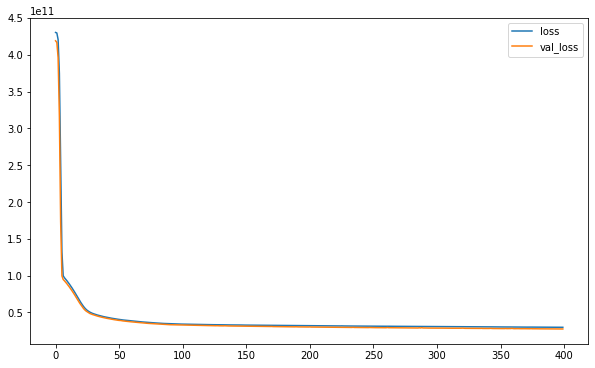

In [38]:
# displays both loss func or training and test data
losses = pd.DataFrame(model.history.history)


losses.plot(figsize=(10,6))

In [39]:
# display metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# formulate predictions
predictions = model.predict(X_test)

In [41]:
# large number since we are dealing with house prices so sqrt it
np.sqrt(mean_squared_error(y_test,predictions))

166130.19116442782

In [42]:
# predictions arent that great since we are off of mean by 20%
mean_absolute_error(y_test,predictions)

102378.57049816744

In [43]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [44]:
explained_variance_score(y_test,predictions)

0.7918901862024991

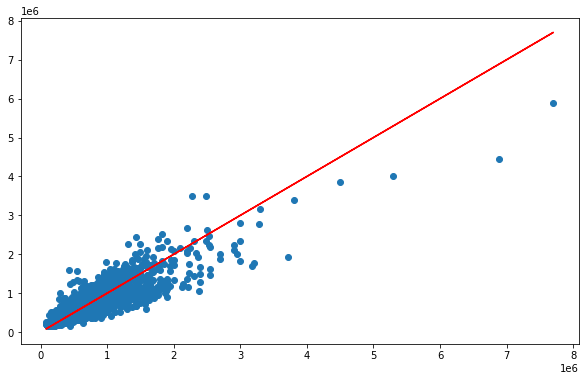

In [47]:
# examine y_test with predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, 'r')

In [55]:
# new house
single_house = df.drop('price',axis=1).iloc[0]

In [56]:
# must reshape since removed column, and transform to normalize
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [59]:
# predict house price, we are a bit off by 50k+
model.predict(single_house)


array([[279460.12]], dtype=float32)

In [60]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
